In [1]:
import sys 
sys.path.append('../')

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll

In [3]:
from fmds.models.diffusion.diffusionـsde import DiffusionSDE

In [4]:
n_samples = 1000

In [5]:
data , _ = make_swiss_roll(n_samples, noise=0.5)

In [6]:
data=data[:,[0,2]]

In [7]:
data.shape

(1000, 2)

In [8]:
data = torch.tensor(data, dtype = torch.float32)

In [9]:
diffusion_sde = DiffusionSDE(data,
                             input_dimension  = 2,
                             hidden_dimension  = 32,
                             number_hidden_layers=5,
                             output_dimension  = 2)


In [10]:
diffusion_sde.fit()

Epoch 0, Loss: 0.9592998027801514
Epoch 100, Loss: 1.0002243518829346
Epoch 200, Loss: 1.0560795068740845
Epoch 300, Loss: 0.9833799004554749
Epoch 400, Loss: 0.9465698003768921
Epoch 500, Loss: 0.9663782715797424
Epoch 600, Loss: 0.9313446283340454
Epoch 700, Loss: 0.9465732574462891
Epoch 800, Loss: 1.010995626449585
Epoch 900, Loss: 1.0251799821853638
Epoch 1000, Loss: 0.9416989684104919
Epoch 1100, Loss: 0.953058660030365
Epoch 1200, Loss: 0.8989568948745728
Epoch 1300, Loss: 0.8175954222679138
Epoch 1400, Loss: 0.8124571442604065
Epoch 1500, Loss: 0.8987336158752441
Epoch 1600, Loss: 0.9838002920150757
Epoch 1700, Loss: 0.8030701875686646
Epoch 1800, Loss: 0.936526894569397
Epoch 1900, Loss: 0.9820541739463806
Epoch 2000, Loss: 0.9112176895141602
Epoch 2100, Loss: 0.8365808725357056
Epoch 2200, Loss: 0.8621660470962524
Epoch 2300, Loss: 1.0358638763427734
Epoch 2400, Loss: 0.99281907081604


In [11]:
synthetic_data = diffusion_sde.generate( 
                 data = data, 
                 n_samples =1500)

Generating noise from forward diffusion for batch 1
Generating noise from forward diffusion for batch 2
Generating noise from forward diffusion for batch 3
Generating noise from forward diffusion for batch 4
Generating noise from forward diffusion for batch 5
Generating noise from forward diffusion for batch 6
Generating noise from forward diffusion for batch 7
Generating noise from forward diffusion for batch 8
Generating noise from forward diffusion for batch 9
Generating noise from forward diffusion for batch 10
Generating noise from forward diffusion for batch 11
Generating noise from forward diffusion for batch 12
Generating noise from forward diffusion for batch 13
Generating noise from forward diffusion for batch 14
Generating noise from forward diffusion for batch 15


Text(0.5, 1.0, 'Synthetic Data Generated by SDE with Predictor-Corrector')

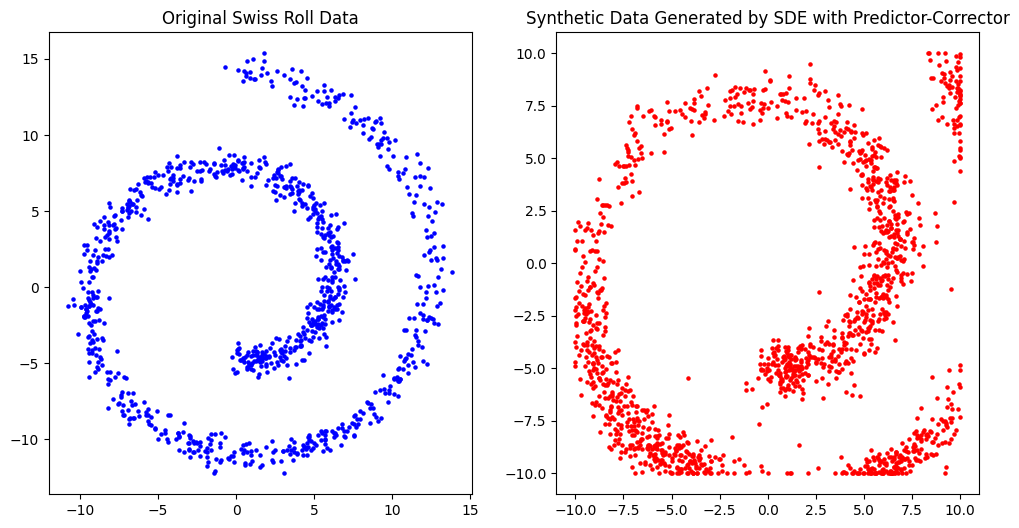

In [12]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(data[:,0], data[:,1], s=5, color ='blue')
plt.title('Original Swiss Roll Data')
plt.subplot(1,2,2)
plt.scatter(synthetic_data[:,0], 
            synthetic_data[:,1],
            s=5,
            color='red')
plt.title('Synthetic Data Generated by SDE with Predictor-Corrector')
            

In [13]:
data_np = data.detach().numpy()
data_np = data_np[~np.isnan(data_np).any(axis=1)]
synthetic_data_np = synthetic_data.detach().numpy()
synthetic_data_np = synthetic_data_np[~np.isnan(synthetic_data_np).any(axis=1)]

In [14]:
from research.plots import qqplot

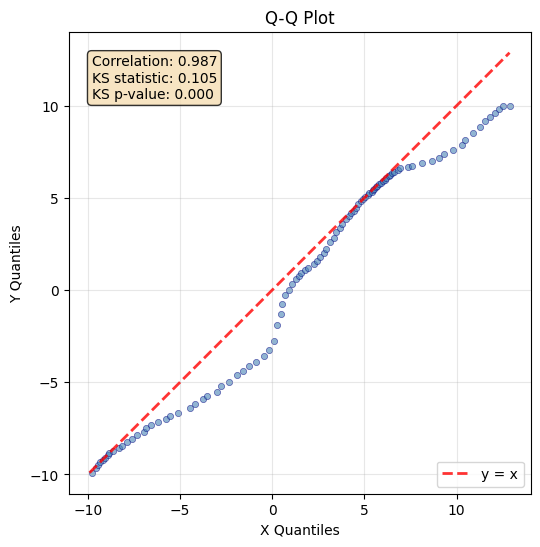

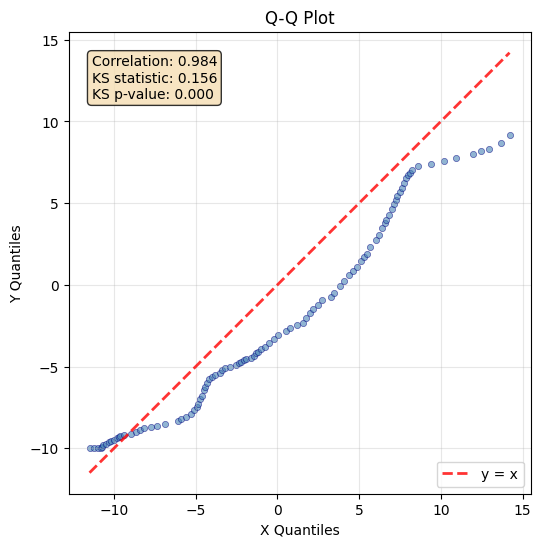

In [15]:
for i in range(0,2):
    _=qqplot(x=data_np[:,i], y= synthetic_data_np[:,i])
    plt.show()
    plt.close()